In [155]:
from matplotlib     import pyplot  as plt
import glob         as gb
import matplotlib   as mp
import numpy        as np
import pandas       as pd
import xarray       as xr
import mitgcm_tools

plt.rcParams['xtick.labelsize'] ='large'
plt.rcParams['ytick.labelsize'] ='large'
plt.rcParams['axes.labelsize' ] ='large'
plt.rcParams['legend.fontsize'] ='large'
plt.rcParams['figure.titlesize']='large'
plt.rcParams['font.size']       ='13'

def fix_contours(fax):
    s=np.shape(fax)
    x=s[0]

    if len(s)==1:
        for i in np.arange(x):
            try:
                for c in fax[i].collections:
                    if c in ['PathCollection']:
                        c.set_edgecolor("face")
                fax[i].set_facecolor("black")
            except (AttributeError):
                try:
                    fax[i].solids.set_edgecolor("face")
                except (AttributeError):
                    raise
    else:
        y=s[1]
        for i in np.arange(x):
            for j in np.arange(y):
                try:
                    for c in fax[i,j].collections:
                        if c in ['PathCollection']:
                            c.set_edgecolor("face")
                    fax[i,j].set_facecolor("black")
                except (AttributeError):
                    try:
                        fax[i,j].solids.set_edgecolor("face")
                    except (AttributeError):
                        raise
    return fax

### Load in grid files for basin with exponential and linear continental slopes

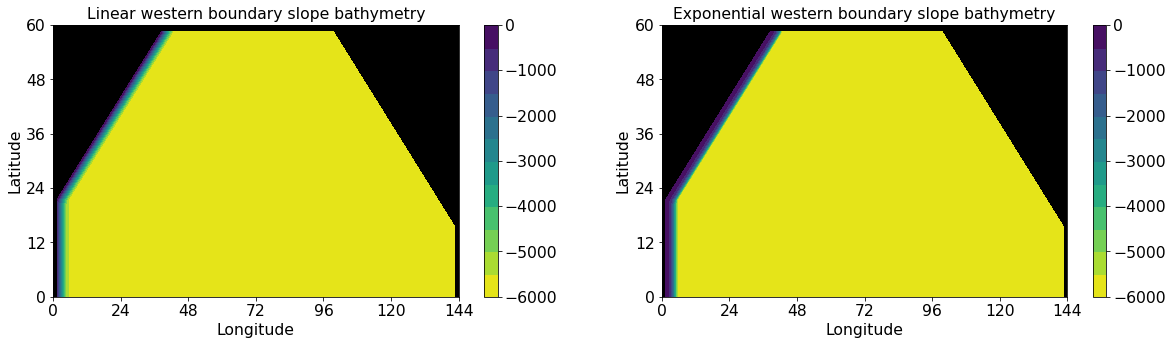

In [156]:
model_dir='/nobackup1/jml1/Idealized_north_pacific_ecosystem/'
#expdir='run_expslp/model_output/run_expslp_global/'
#lindir='run_linslp/model_output/run_linslp_global/'
expdir='run_expslp_12s/model_output/run_expslp_12s_global2/'
lindir='run_linslp_12s/model_output/run_linslp_12s_global/'

grid_exp,xgrid_exp=mitgcm_tools.loadgrid(model_dir+expdir+'grid.glob.nc',basin_masks=False) # ,chunking={'X':6,'Y':6,'Z':6}
grid_exp=grid_exp.transpose('XC','XG','YC','YG','ZC','ZG','ZL','ZR') #.chunk({'XG':6,'YG':6,'ZG':6,'ZL':6,'ZR':6})
grid_lin,xgrid_lin=mitgcm_tools.loadgrid(model_dir+lindir+'grid.glob.nc',basin_masks=False)
grid_lin=grid_lin.transpose('XC','XG','YC','YG','ZC','ZG','ZL','ZR')

f1, f1ax = plt.subplots(figsize=(20,5),ncols=2,nrows=1)
f1cb =f1ax.copy()
f1cax=f1ax.copy()
f1cax[0]=f1ax[0].contourf(grid_lin.lonc,grid_lin.latc,-1*grid_lin.Depth*grid_lin.cmask.isel(ZC=0),
                          levels=np.arange(-6000,500,500),cmap='viridis_r')
f1cb [0]=plt.colorbar(f1cax[0],ax=f1ax[0])
f1ax[0].set(xlim=(0,144),xticks=np.arange(0,168,24),ylim=(0,60),yticks=np.arange(0,72,12),
            title='Linear western boundary slope bathymetry',xlabel='Longitude',ylabel='Latitude')
f1cax[1]=f1ax[1].contourf(grid_exp.lonc,grid_exp.latc,-1*grid_exp.Depth*grid_lin.cmask.isel(ZC=0),
                          levels=np.arange(-6000,500,500),cmap='viridis_r')
f1cb [1] =plt.colorbar(f1cax[1],ax=f1ax[1])
f1ax[1].set(xlim=(0,144),xticks=np.arange(0,168,24),ylim=(0,60),yticks=np.arange(0,72,12),
            title='Exponential western boundary slope bathymetry',xlabel='Longitude',ylabel='Latitude')
f1ax=fix_contours(f1ax)
f1ax=fix_contours(f1cb)
# Can adjust the subplot size
plt.subplots_adjust(hspace=0.3)
plt.show()
f1.savefig('/home/jml1/inp_bathy.pdf',facecolor=f1.get_facecolor(), edgecolor='none',bbox_inches='tight')

### Load fields for display

In [3]:
ocediag     = mitgcm_tools.open_ncfile(model_dir+expdir+'oceDiag.20201103.glob.nc',
                                       strange_axes={'Zmd000060':'ZC','Zld000060':'ZL'},grid=grid_exp,chunking={'T':40})
gmdiag      = mitgcm_tools.open_ncfile(model_dir+expdir+'gmDiag.20201103.glob.nc',
                                       strange_axes={'Zmd000060':'ZC','Zld000060':'ZL'},grid=grid_exp,chunking={'T':40})
oce_flxdiag = mitgcm_tools.open_ncfile(model_dir+expdir+'flxDiag.20201103.glob.nc',
                                       strange_axes={'Zmd000060':'ZC','Zld000060':'ZL'},grid=grid_exp,chunking={'T':40})
oce_surfdiag = mitgcm_tools.open_ncfile(model_dir+expdir+'surfDiag.20201103.glob.nc',
                                       strange_axes={'Zmd000001':'ZC','Zd000001':'ZL'} ,grid=grid_exp,chunking={'T':40})
alk_flxdiag = mitgcm_tools.open_ncfile(model_dir+expdir+'alk_flxDiag.20201103.glob.nc',
                                       strange_axes={'Zmd000060':'ZC','Zld000060':'ZL'},grid=grid_exp,chunking={'T':40})
dic_flxdiag = mitgcm_tools.open_ncfile(model_dir+expdir+'dic_flxDiag.20201103.glob.nc', 
                                       strange_axes={'Zmd000060':'ZC','Zld000060':'ZL'},grid=grid_exp,chunking={'T':40})
dic_surfdiag= mitgcm_tools.open_ncfile(model_dir+expdir+'dic_surfDiag.20201103.glob.nc',
                                       strange_axes={'Zmd000001':'ZC','Zd000001' :'ZL'},grid=grid_exp,chunking={'T':40})
po4_flxdiag = mitgcm_tools.open_ncfile(model_dir+expdir+'po4_flxDiag.20201103.glob.nc', 
                                       strange_axes={'Zmd000060':'ZC','Zld000060':'ZL'},grid=grid_exp,chunking={'T':40})
do2_flxdiag = mitgcm_tools.open_ncfile(model_dir+expdir+'do2_flxDiag.20201103.glob.nc', 
                                       strange_axes={'Zmd000060':'ZC','Zld000060':'ZL'},grid=grid_exp,chunking={'T':40})
#data_parm= mitgcm_tools.getparm('input/data')
#data_dic = mitgcm_tools.getparm('input/data.dic')
forcing_fields = xr.Dataset(
   coords={
       "XC": ("XC", grid_exp['XC'].values),
       "YC": ("YC", grid_exp['YC'].values),
       "RF": ("RF", grid_exp['ZG'].values),
       "RC": ("RC", grid_exp['ZC'].values),
       "time":("time",np.arange(0.5,12.5,1))
   })

forcing_fields['sst_relax'] = xr.DataArray(mitgcm_tools.open_bnfile(model_dir+expdir+"../../sst_relax.bin", sizearr=(12,72,144),prec='>f4'),coords=[forcing_fields['time'].values,grid_exp['YC'].values,grid_exp['XC'].values],dims=['time','YC','XC'])
forcing_fields['taux']      = xr.DataArray(mitgcm_tools.open_bnfile(model_dir+expdir+"../../taux_forc.bin", sizearr=(12,72,144),prec='>f4'),coords=[forcing_fields['time'].values,grid_exp['YC'].values,grid_exp['XC'].values],dims=['time','YC','XC'])
forcing_fields['theta_sbdy']= xr.DataArray(mitgcm_tools.open_bnfile(model_dir+expdir+"../../theta_sbdy.bin",sizearr=(60,72,144),prec='>f4'),coords=[grid_exp['ZC'].values,grid_exp['YC'].values,grid_exp['XC'].values],dims=['ZC','YC','XC'])
forcing_fields['alk_sbdy']  = xr.DataArray(mitgcm_tools.open_bnfile(model_dir+expdir+"../../alk_sbdy.bin",  sizearr=(60,72,144),prec='>f4'),coords=[grid_exp['ZC'].values,grid_exp['YC'].values,grid_exp['XC'].values],dims=['ZC','YC','XC'])
forcing_fields['dic_sbdy']  = xr.DataArray(mitgcm_tools.open_bnfile(model_dir+expdir+"../../dic_sbdy.bin",  sizearr=(60,72,144),prec='>f4'),coords=[grid_exp['ZC'].values,grid_exp['YC'].values,grid_exp['XC'].values],dims=['ZC','YC','XC'])
forcing_fields['po4_sbdy']  = xr.DataArray(mitgcm_tools.open_bnfile(model_dir+expdir+"../../po4_sbdy.bin",  sizearr=(60,72,144),prec='>f4'),coords=[grid_exp['ZC'].values,grid_exp['YC'].values,grid_exp['XC'].values],dims=['ZC','YC','XC'])
forcing_fields['do2_sbdy']  = xr.DataArray(mitgcm_tools.open_bnfile(model_dir+expdir+"../../do2_sbdy.bin",  sizearr=(60,72,144),prec='>f4'),coords=[grid_exp['ZC'].values,grid_exp['YC'].values,grid_exp['XC'].values],dims=['ZC','YC','XC'])
forcing_fields['tsbdy_mask']= xr.DataArray(mitgcm_tools.open_bnfile(model_dir+expdir+"../../theta_rbcs_mask.bin",sizearr=(60,72,144),prec='>f4'),coords=[grid_exp['ZC'].values,grid_exp['YC'].values,grid_exp['XC'].values],dims=['ZC','YC','XC'])
forcing_fields['psbdy_mask']= xr.DataArray(mitgcm_tools.open_bnfile(model_dir+expdir+"../../ptr_rbcs_mask.bin",  sizearr=(60,72,144),prec='>f4'),coords=[grid_exp['ZC'].values,grid_exp['YC'].values,grid_exp['XC'].values],dims=['ZC','YC','XC'])

The axes: T could not be converted
Attributes could not be added for axes: T
Coordinates added or altered for axes: ZC,ZL
The axes: T could not be converted
Attributes could not be added for axes: T
Coordinates added or altered for axes: ZC,ZL
The axes: T could not be converted
Attributes could not be added for axes: T
Coordinates added or altered for axes: ZC,ZL
The axes: T could not be converted
Attributes could not be added for axes: T
The axes: T could not be converted
Attributes could not be added for axes: T
Coordinates added or altered for axes: ZC,ZL
The axes: T could not be converted
Attributes could not be added for axes: T
Coordinates added or altered for axes: ZC,ZL
The axes: T could not be converted
Attributes could not be added for axes: T
The axes: T could not be converted
Attributes could not be added for axes: T
Coordinates added or altered for axes: ZC,ZL
The axes: T could not be converted
Attributes could not be added for axes: T
Coordinates added or altered for axes

In [4]:
# Calculate barotropic streamfunction to show the gyres
gmdiag['GM_UVEL']=(gmdiag.GM_PsiX.differentiate('ZL').interp(ZL=grid_exp.ZC)*-1)
gmdiag['GM_VVEL']=(gmdiag.GM_PsiY.differentiate('ZL').interp(ZL=grid_exp.ZC)*-1)

ocediag['URES'] = ocediag['UVEL'] + gmdiag['GM_UVEL']
ocediag['VRES'] = ocediag['VVEL'] + gmdiag['GM_VVEL']

baro_mask=grid_exp.umask.interp(YC=grid_exp.coords['YG'],method='linear')
ubaro=(((ocediag['URES'] * grid_exp.HFacW * grid_exp.drF * grid_exp.dyG).sum(dim='ZC').sel(YC=slice(None, None, -1)) .cumsum('YC')).sel(YC=slice(None, None, -1)).interp(YC=grid_exp.coords['YG'],method='linear'))*baro_mask.isel(ZC=0)
vbaro=(  ocediag['VRES'] * np.cos(grid_exp.coords['YG']*(np.pi/180)) * grid_exp.HFacS * grid_exp.drF * grid_exp.dxG).sum(dim='ZC').cumsum('XC').interp(XC=grid_exp.coords['XG'],method='linear')*baro_mask.isel(ZC=0)
baro =( ubaro+vbaro)

# Calculate barotropic streamfunction for linear slope to show the gyres
locediag     = mitgcm_tools.open_ncfile(model_dir+lindir+'oceDiag.20201103.glob.nc',
                                       strange_axes={'Zmd000060':'ZC','Zld000060':'ZL'},grid=grid_exp,chunking={'T':40})
lgmdiag      = mitgcm_tools.open_ncfile(model_dir+lindir+'gmDiag.20201103.glob.nc',
                                       strange_axes={'Zmd000060':'ZC','Zld000060':'ZL'},grid=grid_exp,chunking={'T':40})

lgmdiag['GM_UVEL']=(lgmdiag.GM_PsiX.differentiate('ZL').interp(ZL=grid_lin.ZC)*-1)
lgmdiag['GM_VVEL']=(lgmdiag.GM_PsiY.differentiate('ZL').interp(ZL=grid_lin.ZC)*-1)

locediag['URES'] = locediag['UVEL'] + lgmdiag['GM_UVEL']
locediag['VRES'] = locediag['VVEL'] + lgmdiag['GM_VVEL']

lbaro_mask=grid_lin.umask.interp(YC=grid_lin.coords['YG'],method='linear')
lubaro=(((locediag['URES'] * grid_lin.HFacW * grid_lin.drF * grid_lin.dyG).sum(dim='ZC').sel(YC=slice(None, None, -1)) .cumsum('YC')).sel(YC=slice(None, None, -1)).interp(YC=grid_lin.coords['YG'],method='linear'))*lbaro_mask.isel(ZC=0)
lvbaro=(  locediag['VRES'] * np.cos(grid_lin.coords['YG']*(np.pi/180)) * grid_lin.HFacS * grid_lin.drF * grid_lin.dxG).sum(dim='ZC').cumsum('XC').interp(XC=grid_lin.coords['XG'],method='linear')*lbaro_mask.isel(ZC=0)
lbaro =( lubaro+lvbaro)

The axes: T could not be converted
Attributes could not be added for axes: T
Coordinates added or altered for axes: ZC,ZL
The axes: T could not be converted
Attributes could not be added for axes: T
Coordinates added or altered for axes: ZC,ZL


### Do some plots

/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


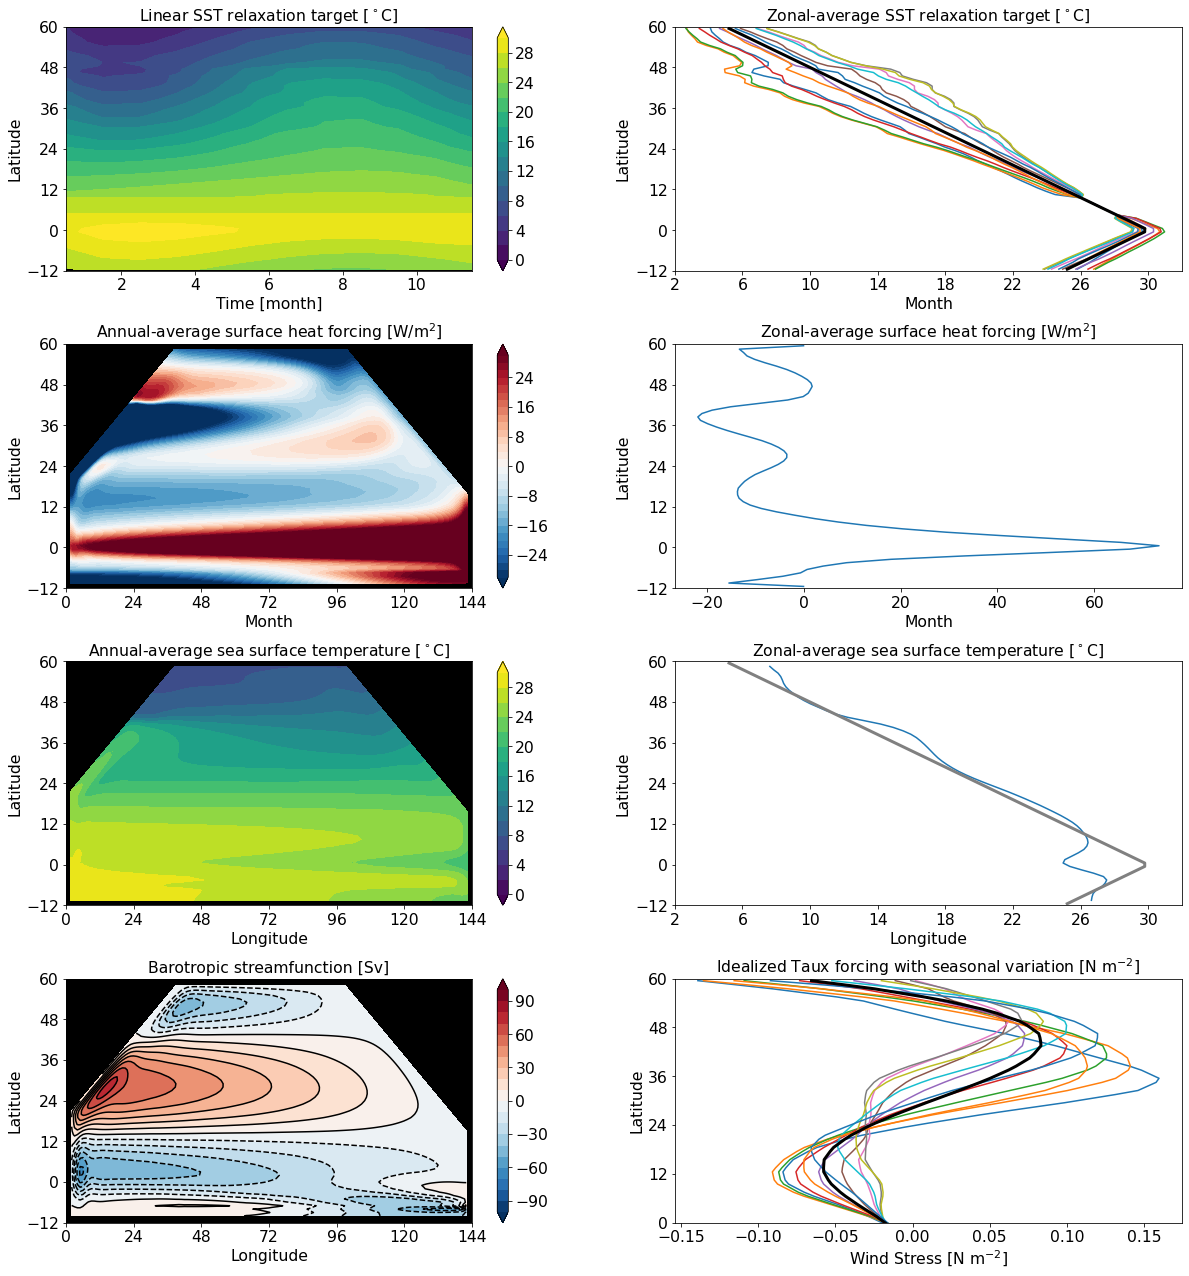

In [161]:
f2, f2ax = plt.subplots(figsize=(20,22),ncols=2,nrows=4)
f2cb =f2ax.copy()
f2cax=f2ax.copy()

f2cax[0,0]=f2ax[0,0].contourf(forcing_fields.time,forcing_fields.YC,forcing_fields.sst_relax.mean('XC').T,
                        levels=np.arange(0,32,2),extend='both',cmap='viridis')
f2cb[0,0]=plt.colorbar(f2cax[0,0],ax=f2ax[0,0])
f2ax[0,0].set(ylim=(-12,60),yticks=np.arange(-12,72,12),
              title='Linear SST relaxation target [$^\circ$C]',
              xlabel='Time [month]',ylabel='Latitude',facecolor='black')
f2ax[0,1].plot(forcing_fields.sst_relax.mean('XC').T,np.tile(forcing_fields.YC,[12,1]).T)
f2ax[0,1].plot(forcing_fields.sst_relax.mean({'XC','time'}).T,forcing_fields.YC,color='black',linewidth=3)
f2ax[0,1].set(ylim=(-12,60),yticks=np.arange(-12,72,12),xlim=(2,32),xticks=np.arange(2,34,4),
              title='Zonal-average SST relaxation target [$^\circ$C]',
              xlabel='Month',ylabel='Latitude')
f2cax[1,0]=f2ax[1,0].contourf(grid_exp.lonc,grid_exp.latc,oce_surfdiag.TFLUX.isel(T=-1).T*grid_exp.cmask.isel(ZC=0),
                          levels=np.arange(-30,32,2),cmap='RdBu_r',extend='both')
f2cb[1,0]=plt.colorbar(f2cax[1,0],ax=f2ax[1,0])
f2ax[1,0].set(ylim=(-12,60),yticks=np.arange(-12,72,12),xlim=(0,144),xticks=np.arange(0,168,24),
              title='Annual-average surface heat forcing [W/m$^2$]',
              xlabel='Month',ylabel='Latitude',facecolor='black')
f2ax[1,1].plot(oce_surfdiag.TFLUX.isel(T=-1).mean('XC'),grid_exp.latc.mean('XC'))
f2ax[1,1].set(ylim=(-12,60),yticks=np.arange(-12,72,12),
            title='Zonal-average surface heat forcing [W/m$^2$]',xlabel='Month',ylabel='Latitude')
f2cax[2,0]=f2ax[2,0].contourf(grid_exp.lonc,grid_exp.latc,ocediag.THETA.isel(T=-1,ZC=0).T*grid_exp.cmask.isel(ZC=0),
                          levels=np.arange(0,32,2),extend='both',cmap='viridis')
f2cb[2,0]=plt.colorbar(f2cax[2,0],ax=f2ax[2,0])
f2ax[2,0].set(ylim=(-12,60),yticks=np.arange(-12,72,12),xlim=(0,144),xticks=np.arange(0,168,24),
              title='Annual-average sea surface temperature [$^\circ$C]',
              xlabel='Longitude',ylabel='Latitude',facecolor='black')
f2ax[2,1].plot((ocediag.THETA.isel(T=-1)*grid_exp.cmask).isel(ZC=0).mean('XC'),grid_exp.latc.mean('XC'))
f2ax[2,1].plot(forcing_fields.sst_relax.mean({'XC','time'}).T,forcing_fields.YC,color='grey',linewidth=3)
f2ax[2,1].set(ylim=(-12,60),yticks=np.arange(-12,72,12),xlim=(2,32),xticks=np.arange(2,34,4),
            title='Zonal-average sea surface temperature [$^\circ$C]',xlabel='Longitude',ylabel='Latitude')
f2cax[3,0]=f2ax[3,0].contourf(grid_exp.XG,grid_exp.YG,(baro.isel(T=-1)/1e6),
                   levels=np.arange(-100,110,10),extend='both',cmap='RdBu_r')
f2cb[3,0]=plt.colorbar(f2cax[3,0],ax=f2ax[3,0])
f2ax[3,0].set(ylim=(-12,60),yticks=np.arange(-12,72,12),xlim=(0,144),xticks=np.arange(0,168,24),
              title='Barotropic streamfunction [Sv]',
              xlabel='Longitude',ylabel='Latitude',facecolor='black')
f2ax[3,0].contour(grid_exp.XG,grid_exp.YG,(baro.isel(T=-1)/1e6),
                  levels=np.arange(-100,110,10),colors='black')
f2ax[3,1].plot(forcing_fields.taux.mean('XC').T,np.tile(forcing_fields.YC,[12,1]).T)
f2ax[3,1].plot(forcing_fields.taux.mean({'XC','time'}).T,forcing_fields.YC,color='black',linewidth=3)
f2ax[3,1].set(ylim=(0,60),yticks=np.arange(0,72,12),
            title='Idealized Taux forcing with seasonal variation [N m$^{-2}$]',xlabel='Wind Stress [N m$^{-2}$]',ylabel='Latitude')
# Can adjust the subplot size
plt.subplots_adjust(hspace=0.3)
plt.show()
f2.savefig('/home/jml1/inp_phys.pdf',facecolor=f2.get_facecolor(), edgecolor='none',bbox_inches='tight')

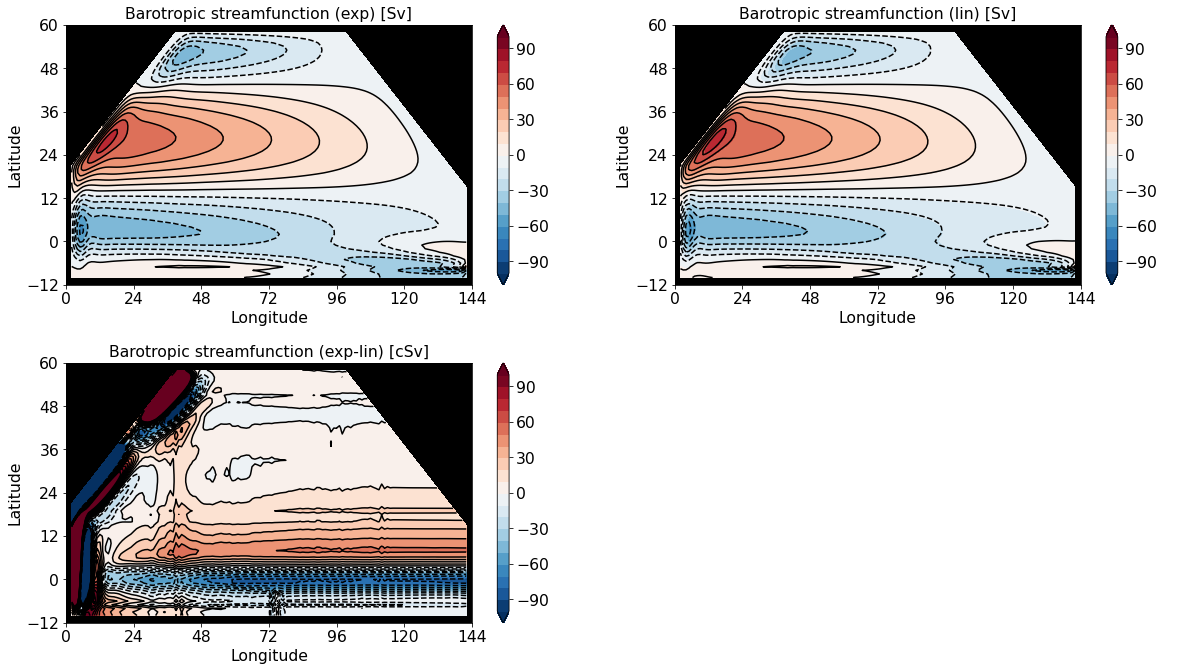

In [165]:
f2a, f2aax = plt.subplots(figsize=(20,11),ncols=2,nrows=2)
f2acb =f2aax.copy()
f2acax=f2aax.copy()

f2acax[0,0]=f2aax[0,0].contourf(grid_exp.XG,grid_exp.YG,(baro.isel(T=-1)/1e6),
                   levels=np.arange(-100,110,10),extend='both',cmap='RdBu_r')
f2acb[0,0]=plt.colorbar(f2acax[0,0],ax=f2aax[0,0])
f2aax[0,0].contour(grid_exp.XG,grid_exp.YG,(baro.isel(T=-1)/1e6),
                  levels=np.arange(-100,110,10),colors='black')
f2aax[0,0].set(ylim=(-12,60),yticks=np.arange(-12,72,12),xlim=(0,144),xticks=np.arange(0,168,24),
            title='Barotropic streamfunction (exp) [Sv]',xlabel='Longitude',ylabel='Latitude')
f2acax[0,1]=f2aax[0,1].contourf(grid_exp.XG,grid_exp.YG,(baro.isel(T=-1)/1e6),
                   levels=np.arange(-100,110,10),extend='both',cmap='RdBu_r')
f2acb[0,1]=plt.colorbar(f2acax[0,1],ax=f2aax[0,1])
f2aax[0,1].contour(grid_lin.XG,grid_lin.YG,(lbaro.isel(T=-1)/1e6),
                  levels=np.arange(-100,110,10),colors='black')
f2aax[0,1].set(ylim=(-12,60),yticks=np.arange(-12,72,12),xlim=(0,144),xticks=np.arange(0,168,24),
            title='Barotropic streamfunction (lin) [Sv]',xlabel='Longitude',ylabel='Latitude')
f2acax[1,0]=f2aax[1,0].contourf(grid_lin.XG,grid_lin.YG,((baro.isel(T=-1)-lbaro.isel(T=-1))/1e4),
                   levels=np.arange(-100,110,10),extend='both',cmap='RdBu_r')
f2acb[1,0]=plt.colorbar(f2acax[1,0],ax=f2aax[1,0])
f2aax[1,0].contour(grid_exp.XG,grid_exp.YG,((baro.isel(T=-1)-lbaro.isel(T=-1))/1e4),
                  levels=np.arange(-100,110,10),colors='black')
f2aax[1,0].set(ylim=(-12,60),yticks=np.arange(-12,72,12),xlim=(0,144),xticks=np.arange(0,168,24),
            title='Barotropic streamfunction (exp-lin) [cSv]',xlabel='Longitude',ylabel='Latitude')
f2aax[1,1].axes.get_xaxis().set_visible(False)
f2aax[1,1].get_yaxis().set_visible(False)
f2aax[1,1].set_facecolor((1,1,1,0))
f2aax[1,1].set_axis_off()

f2aax=fix_contours(f2aax)
f2acb=fix_contours(f2acb)
# Can adjust the subplot size
plt.subplots_adjust(hspace=0.3)
plt.show()
f2a.savefig('/home/jml1/inp_baroexplin.pdf',facecolor=f2a.get_facecolor(), edgecolor='none',bbox_inches='tight')

### Load climatologies for model-data comparisons

In [7]:
# World Ocean Atlas 2018 1° annual averages
urlwoat='http://apdrc.soest.hawaii.edu:80/dods/public_data/WOA/WOA18/1_deg/annual/Avg_Decades_1955-2017/temp'
urlwoas='http://apdrc.soest.hawaii.edu:80/dods/public_data/WOA/WOA18/1_deg/annual/Avg_Decades_1955-2017/salt'
urlwoap='http://apdrc.soest.hawaii.edu:80/dods/public_data/WOA/WOA18/1_deg/annual/phosphate'
urlwoan='http://apdrc.soest.hawaii.edu:80/dods/public_data/WOA/WOA18/1_deg/annual/nitrate'
urlwoao='http://apdrc.soest.hawaii.edu:80/dods/public_data/WOA/WOA18/1_deg/annual/oxygen'
urlwoau='http://apdrc.soest.hawaii.edu:80/dods/public_data/WOA/WOA18/1_deg/annual/aou'
urlwoax='http://apdrc.soest.hawaii.edu:80/dods/public_data/WOA/WOA18/1_deg/annual/o2sat'
urlwoai='http://apdrc.soest.hawaii.edu:80/dods/public_data/WOA/WOA18/1_deg/annual/silicate'

# Conversions
rhoconst     = 1024.5
perl_2_perkg = 1000/rhoconst # e.g. mol l-1 * 1000 l m-3 * 1/rho m3 kg-1 -> mol kg-1
perm3_2_perl = 1.0/1000      # e.g. mol m-3 * 1/1000 m3 l-1 -> mol l-1
molperm3_2_umolperkg=1e6/rhoconst

woa_data=xr.open_dataset(urlwoat,decode_times=False).rename({'lev':'depth'}).squeeze('time') \
                                .reset_coords(drop=True)
woa_data['san'] = xr.open_dataset(urlwoas,decode_times=False).rename({'lev':'depth'}).squeeze('time') \
                                .reset_coords(drop=True)['san']
woa_data['pan'] = xr.open_dataset(urlwoap,decode_times=False).rename({'lev':'depth'}).squeeze('time') \
                                .reset_coords(drop=True)['pan']*perl_2_perkg/molperm3_2_umolperkg
woa_data['nan'] = xr.open_dataset(urlwoan,decode_times=False).rename({'lev':'depth'}).squeeze('time') \
                                .reset_coords(drop=True)['nan']*perl_2_perkg/molperm3_2_umolperkg
woa_data['oan'] = xr.open_dataset(urlwoao,decode_times=False).rename({'lev':'depth'}).squeeze('time') \
                                .reset_coords(drop=True)['oan']*molperm3_2_umolperkg/1000
woa_data['uan'] = xr.open_dataset(urlwoau,decode_times=False).rename({'lev':'depth'}).squeeze('time') \
                                .reset_coords(drop=True)['aan']*molperm3_2_umolperkg/1000
woa_data['xan'] = xr.open_dataset(urlwoax,decode_times=False).rename({'lev':'depth'}).squeeze('time') \
                                .reset_coords(drop=True)['oan']
woa_data['ian'] = xr.open_dataset(urlwoai,decode_times=False).rename({'lev':'depth'}).squeeze('time') \
                                .reset_coords(drop=True)['ian']*perl_2_perkg/molperm3_2_umolperkg
# centre the Pacific
woa_data=woa_data.assign_coords({"lon": (((woa_data['lon']+ 360) % 360))}).roll(lon=180,roll_coords=True)

yc,xc=np.meshgrid(woa_data.lat.values,woa_data.lon.values)
atlantic_mask, pacific_mask, indian_mask, so_mask, arctic_mask = mitgcm_tools.oceanmasks(xc,yc,np.isfinite(woa_data.tan).T.values)
woa_data['atlantic_mask'] = xr.DataArray(atlantic_mask, coords=[woa_data.lon.values, woa_data.lat.values, woa_data.depth.values], dims=['lon', 'lat', 'depth'])
woa_data['pacific_mask']  = xr.DataArray(pacific_mask , coords=[woa_data.lon.values, woa_data.lat.values, woa_data.depth.values], dims=['lon', 'lat', 'depth'])
woa_data['indian_mask']   = xr.DataArray(indian_mask  , coords=[woa_data.lon.values, woa_data.lat.values, woa_data.depth.values], dims=['lon', 'lat', 'depth'])
woa_data['so_mask']       = xr.DataArray(so_mask      , coords=[woa_data.lon.values, woa_data.lat.values, woa_data.depth.values], dims=['lon', 'lat', 'depth'])
woa_data['arctic_mask']   = xr.DataArray(arctic_mask  , coords=[woa_data.lon.values, woa_data.lat.values, woa_data.depth.values], dims=['lon', 'lat', 'depth'])

urlgloc='/home/jml1/Applications/Data/GLODAPv2.2016b.TCO2.nc'
urlgloa='/home/jml1/Applications/Data/GLODAPv2.2016b.TAlk.nc'
urlgloo='/home/jml1/Applications/Data/GLODAPv2.2016b.oxygen.nc'
urlglot='/home/jml1/Applications/Data/GLODAPv2.2016b.temperature.nc'
urlglos='/home/jml1/Applications/Data/GLODAPv2.2016b.salinity.nc'
glo_data=xr.open_dataset(urlgloc,decode_times=False).rename({'depth_surface':'depth'})
glo_data['TCO2']=glo_data['TCO2']/molperm3_2_umolperkg
glo_data['TALK']=xr.open_dataset(urlgloa,decode_times=False).rename({'depth_surface':'depth'})['TAlk']/molperm3_2_umolperkg
glo_data['TEMP']=xr.open_dataset(urlglot,decode_times=False).rename({'depth_surface':'depth'})['temperature']
glo_data['SALT']=xr.open_dataset(urlglos,decode_times=False).rename({'depth_surface':'depth'})['salinity']
glo_data['DOXY']=xr.open_dataset(urlgloo,decode_times=False).rename({'depth_surface':'depth'})['oxygen']/molperm3_2_umolperkg

glo_data=glo_data.assign_coords({"depth":glo_data.Depth})

yc,xc=np.meshgrid(glo_data.lat.values,glo_data.lon.values)
atlantic_mask, pacific_mask, indian_mask, so_mask, arctic_mask = mitgcm_tools.oceanmasks(xc,yc,np.isfinite(glo_data.TCO2).T.values)
glo_data['atlantic_mask'] = xr.DataArray(atlantic_mask, coords=[glo_data.lon.values, glo_data.lat.values, glo_data.depth.values], dims=['lon', 'lat', 'depth'])
glo_data['pacific_mask']  = xr.DataArray(pacific_mask , coords=[glo_data.lon.values, glo_data.lat.values, glo_data.depth.values], dims=['lon', 'lat', 'depth'])
glo_data['indian_mask']   = xr.DataArray(indian_mask  , coords=[glo_data.lon.values, glo_data.lat.values, glo_data.depth.values], dims=['lon', 'lat', 'depth'])
glo_data['so_mask']       = xr.DataArray(so_mask      , coords=[glo_data.lon.values, glo_data.lat.values, glo_data.depth.values], dims=['lon', 'lat', 'depth'])
glo_data['arctic_mask']   = xr.DataArray(arctic_mask  , coords=[glo_data.lon.values, glo_data.lat.values, glo_data.depth.values], dims=['lon', 'lat', 'depth'])

read mask file at /home/jml1/Applications/Python/mitgcm_tools/woa13_basinmask_01.msk found by searching python path.
read mask file at /home/jml1/Applications/Python/mitgcm_tools/woa13_basinmask_01.msk found by searching python path.


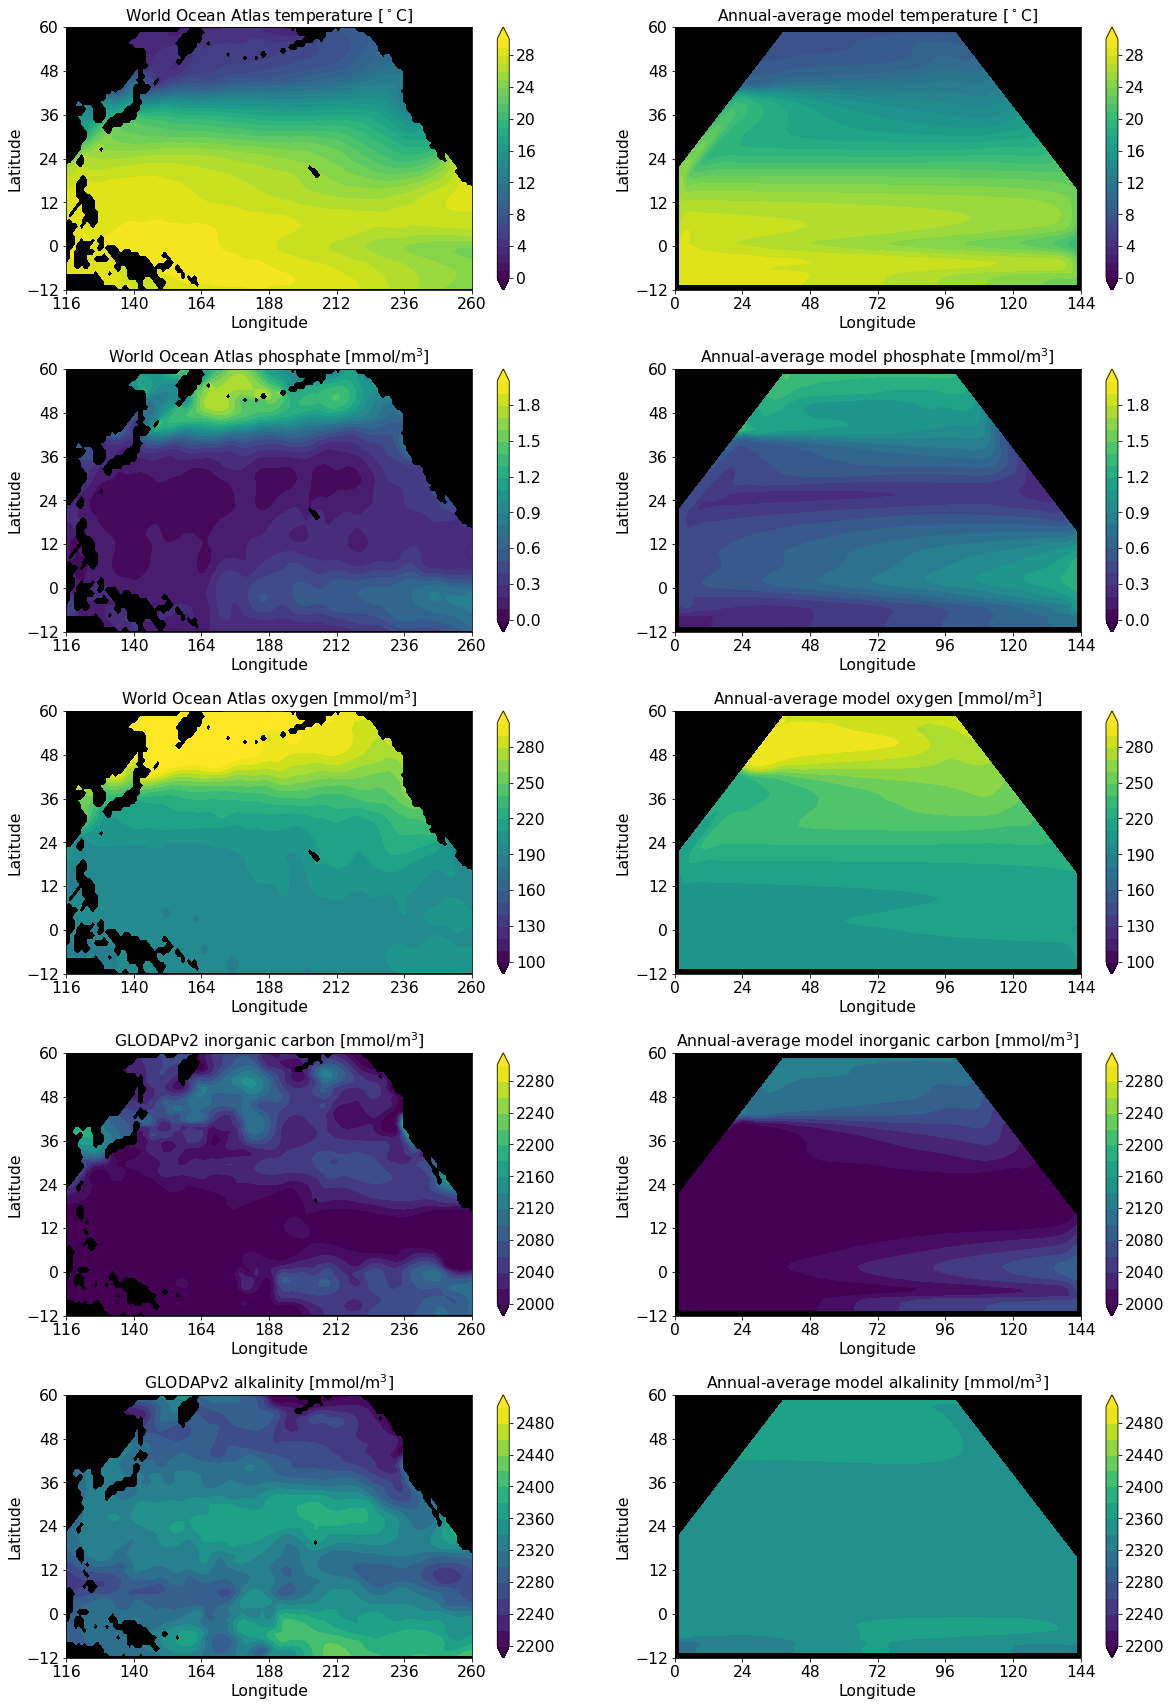

In [168]:
f3, f3ax = plt.subplots(figsize=(20,30),ncols=2,nrows=5)
f3cb =f3ax.copy()
f3cax=f3ax.copy()

# Sea surface temperature
f3cax[0,0]=f3ax[0,0].contourf(woa_data.lon,woa_data.lat,
                              woa_data.tan.where(woa_data.pacific_mask==1).where(woa_data.lat >=-12).isel(depth=0),
                              levels=np.arange(0,31,1),cmap='viridis',extend='both')
f3cb[0,0]=plt.colorbar(f3cax[0,0],ax=f3ax[0,0])
f3ax[0,0].set(ylim=(-12,60),yticks=np.arange(-12,72,12),xlim=(116,260),xticks=np.arange(116,284,24),
            title='World Ocean Atlas temperature [$^\circ$C]',xlabel='Longitude',ylabel='Latitude')
for a in f2ax[3,0].collections:
    a.set_edgecolor("face")
f2cb[3,0].solids.set_edgecolor("face")
f3cax[0,1]=f3ax[0,1].contourf(grid_exp.XC,grid_exp.YC,(ocediag.THETA.isel(T=-1)*grid_exp.cmask).isel(ZC=0),
                          levels=np.arange(0,31,1),extend='both',cmap='viridis')
f3cb[0,1]=plt.colorbar(f3cax[0,1],ax=f3ax[0,1])
f3ax[0,1].set(ylim=(-12,60),yticks=np.arange(-12,72,12),xlim=(0,144),xticks=np.arange(0,168,24),
            title='Annual-average model temperature [$^\circ$C]',xlabel='Longitude',ylabel='Latitude')
# Nitrate concentration
f3cax[1,0]=f3ax[1,0].contourf(woa_data.lon,woa_data.lat,
                              1000*woa_data.pan.where(woa_data.pacific_mask==1).where(woa_data.lat >=-12).isel(depth=0),
                              levels=np.arange(0,2.1,0.1),cmap='viridis',extend='both')
f3cb[1,0]=plt.colorbar(f3cax[1,0],ax=f3ax[1,0])
f3ax[1,0].set(ylim=(-12,60),yticks=np.arange(-12,72,12),xlim=(116,260),xticks=np.arange(116,284,24),
            title='World Ocean Atlas phosphate [mmol/m$^3$]',xlabel='Longitude',ylabel='Latitude')
f3cax[1,1]=f3ax[1,1].contourf(grid_exp.XC,grid_exp.YC,
                              1000*(po4_flxdiag.TRAC03.isel(T=-1)*grid_exp.cmask).isel(ZC=0),
                              levels=np.arange(0,2.1,0.1),extend='both',cmap='viridis')
f3cb[1,1]=plt.colorbar(f3cax[1,1],ax=f3ax[1,1])
f3ax[1,1].set(ylim=(-12,60),yticks=np.arange(-12,72,12),xlim=(0,144),xticks=np.arange(0,168,24),
            title='Annual-average model phosphate [mmol/m$^3$]',xlabel='Longitude',ylabel='Latitude')
# Oxygen concentration
f3cax[2,0]=f3ax[2,0].contourf(woa_data.lon,woa_data.lat,
                              woa_data.oan.where(woa_data.pacific_mask==1).where(woa_data.lat >=-12).isel(depth=0),
                              levels=np.arange(100,310,10),cmap='viridis',extend='both')
f3cb[2,0]=plt.colorbar(f3cax[2,0],ax=f3ax[2,0])
f3ax[2,0].set(ylim=(-12,60),yticks=np.arange(-12,72,12),xlim=(116,260),xticks=np.arange(116,284,24),
            title='World Ocean Atlas oxygen [mmol/m$^3$]',xlabel='Longitude',ylabel='Latitude')
f3cax[2,1]=f3ax[2,1].contourf(grid_exp.XC,grid_exp.YC,
                              1000*(do2_flxdiag.TRAC05.isel(T=-1)*grid_exp.cmask).isel(ZC=0),
                              levels=np.arange(100,310,10),extend='both',cmap='viridis')
f3cb[2,1]=plt.colorbar(f3cax[2,1],ax=f3ax[2,1])
f3ax[2,1].set(ylim=(-12,60),yticks=np.arange(-12,72,12),xlim=(0,144),xticks=np.arange(0,168,24),
            title='Annual-average model oxygen [mmol/m$^3$]',xlabel='Longitude',ylabel='Latitude')
# DIC concentration
f3cax[3,0]=f3ax[3,0].contourf(glo_data.lon,glo_data.lat,
                              1000*glo_data.TCO2.where(glo_data.pacific_mask==1).where(glo_data.lat >=-12).isel(depth=0),
                              levels=np.arange(2000,2320,20),cmap='viridis',extend='both')
f3cb[3,0]=plt.colorbar(f3cax[3,0],ax=f3ax[3,0])
f3ax[3,0].set(ylim=(-12,60),yticks=np.arange(-12,72,12),xlim=(116,260),xticks=np.arange(116,284,24),
            title='GLODAPv2 inorganic carbon [mmol/m$^3$]',xlabel='Longitude',ylabel='Latitude')
f3cax[3,1]=f3ax[3,1].contourf(grid_exp.XC,grid_exp.YC,
                              1000*(dic_flxdiag.TRAC01.isel(T=-1)*grid_exp.cmask).isel(ZC=0),
                              levels=np.arange(2000,2320,20),extend='both',cmap='viridis')
f3cb[3,1]=plt.colorbar(f3cax[3,1],ax=f3ax[3,1])
f3ax[3,1].set(ylim=(-12,60),yticks=np.arange(-12,72,12),xlim=(0,144),xticks=np.arange(0,168,24),
            title='Annual-average model inorganic carbon [mmol/m$^3$]',xlabel='Longitude',ylabel='Latitude')
# Alk concentration
f3cax[4,0]=f3ax[4,0].contourf(glo_data.lon,glo_data.lat,
                              1000*glo_data.TALK.where(glo_data.pacific_mask==1).where(glo_data.lat >=-12).isel(depth=0),
                              levels=np.arange(2200,2520,20),cmap='viridis',extend='both')
f3cb[4,0]=plt.colorbar(f3cax[4,0],ax=f3ax[4,0])
f3ax[4,0].set(ylim=(-12,60),yticks=np.arange(-12,72,12),xlim=(116,260),xticks=np.arange(116,284,24),
            title='GLODAPv2 alkalinity [mmol/m$^3$]',xlabel='Longitude',ylabel='Latitude')
f3cax[4,1]=f3ax[4,1].contourf(grid_exp.XC,grid_exp.YC,
                              1000*(alk_flxdiag.TRAC02.isel(T=-1)*grid_exp.cmask).isel(ZC=0),
                              levels=np.arange(2200,2520,20),extend='both',cmap='viridis')
f3cb[4,1]=plt.colorbar(f3cax[4,1],ax=f3ax[4,1])
f3ax[4,1].set(ylim=(-12,60),yticks=np.arange(-12,72,12),xlim=(0,144),xticks=np.arange(0,168,24),
            title='Annual-average model alkalinity [mmol/m$^3$]',xlabel='Longitude',ylabel='Latitude')
f3ax=fix_contours(f3ax)
f3cb=fix_contours(f3cb)
# Can adjust the subplot size
plt.subplots_adjust(hspace=0.3)
plt.show()
f3.savefig('/home/jml1/inp_surf.pdf',facecolor=f3.get_facecolor(), edgecolor='none',bbox_inches='tight')

/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


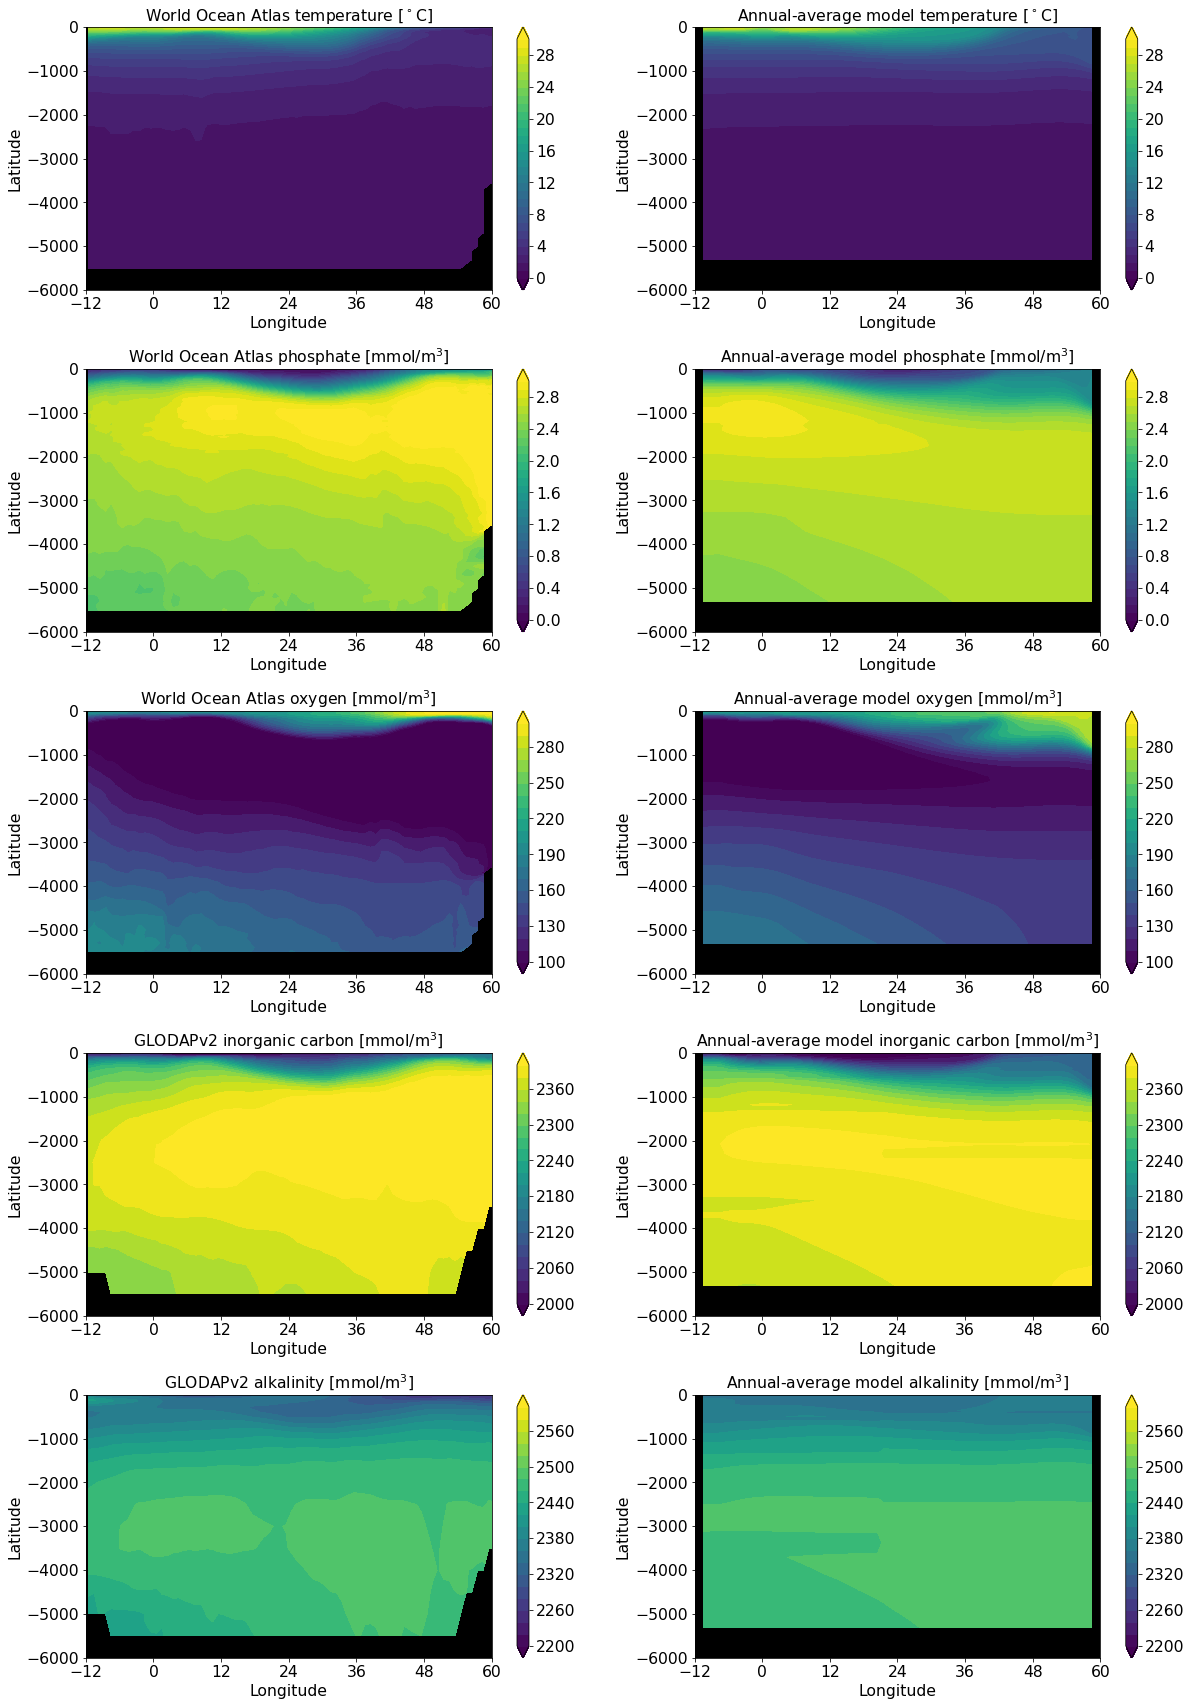

In [169]:
f4, f4ax = plt.subplots(figsize=(20,30),ncols=2,nrows=5)
f4cb =f4ax.copy()
f4cax=f4ax.copy()

# Sea surface temperature
f4cax[0,0]=f4ax[0,0].contourf(woa_data.lat,-woa_data.depth,
                              woa_data.tan.where(woa_data.pacific_mask==1).where(woa_data.lat >=-12).mean('lon'),
                              levels=np.arange(0,31,1),cmap='viridis',extend='both')
f4cb[0,0]=plt.colorbar(f4cax[0,0],ax=f4ax[0,0])
f4ax[0,0].set(ylim=(-6000,0),yticks=np.arange(-6000,1000,1000),xlim=(-12,60),xticks=np.arange(-12,72,12),
            title='World Ocean Atlas temperature [$^\circ$C]',xlabel='Longitude',ylabel='Latitude')
f4cax[0,1]=f4ax[0,1].contourf(grid_exp.YC,grid_exp.ZC,(ocediag.THETA.isel(T=-1)*grid_exp.cmask).mean('XC'),
                          levels=np.arange(0,31,1),extend='both',cmap='viridis')
f4cb[0,1]=plt.colorbar(f4cax[0,1],ax=f4ax[0,1])
f4ax[0,1].set(ylim=(-6000,0),yticks=np.arange(-6000,1000,1000),xlim=(-12,60),xticks=np.arange(-12,72,12),
            title='Annual-average model temperature [$^\circ$C]',xlabel='Longitude',ylabel='Latitude')
# Phosphate concentration
f4cax[1,0]=f4ax[1,0].contourf(woa_data.lat,-woa_data.depth,
                              1000*woa_data.pan.where(woa_data.pacific_mask==1).where(woa_data.lat >=-12).mean('lon'),
                              levels=np.arange(0,3.1,0.1),cmap='viridis',extend='both')
f4cb[1,0]=plt.colorbar(f4cax[1,0],ax=f4ax[1,0])
f4ax[1,0].set(ylim=(-6000,0),yticks=np.arange(-6000,1000,1000),xlim=(-12,60),xticks=np.arange(-12,72,12),
            title='World Ocean Atlas phosphate [mmol/m$^3$]',xlabel='Longitude',ylabel='Latitude')
f4cax[1,1]=f4ax[1,1].contourf(grid_exp.YC,grid_exp.ZC,
                              1000*(po4_flxdiag.TRAC03.isel(T=-1)*grid_exp.cmask).mean('XC'),
                              levels=np.arange(0,3.1,0.1),extend='both',cmap='viridis')
f4cb[1,1]=plt.colorbar(f4cax[1,1],ax=f4ax[1,1])
f4ax[1,1].set(ylim=(-6000,0),yticks=np.arange(-6000,1000,1000),xlim=(-12,60),xticks=np.arange(-12,72,12),
            title='Annual-average model phosphate [mmol/m$^3$]',xlabel='Longitude',ylabel='Latitude')
# Oxygen concentration
f4cax[2,0]=f4ax[2,0].contourf(woa_data.lat,-woa_data.depth,
                              woa_data.oan.where(woa_data.pacific_mask==1).where(woa_data.lat >=-12).mean('lon'),
                              levels=np.arange(100,310,10),cmap='viridis',extend='both')
f4cb[2,0]=plt.colorbar(f4cax[2,0],ax=f4ax[2,0])
f4ax[2,0].set(ylim=(-6000,0),yticks=np.arange(-6000,1000,1000),xlim=(-12,60),xticks=np.arange(-12,72,12),
            title='World Ocean Atlas oxygen [mmol/m$^3$]',xlabel='Longitude',ylabel='Latitude')
f4cax[2,1]=f4ax[2,1].contourf(grid_exp.YC,grid_exp.ZC,
                              1000*(do2_flxdiag.TRAC05.isel(T=-1)*grid_exp.cmask).mean('XC'),
                              levels=np.arange(100,310,10),extend='both',cmap='viridis')
f4cb[2,1]=plt.colorbar(f4cax[2,1],ax=f4ax[2,1])
f4ax[2,1].set(ylim=(-6000,0),yticks=np.arange(-6000,1000,1000),xlim=(-12,60),xticks=np.arange(-12,72,12),
            title='Annual-average model oxygen [mmol/m$^3$]',xlabel='Longitude',ylabel='Latitude')
# DIC concentration
f4cax[3,0]=f4ax[3,0].contourf(glo_data.lat,-glo_data.depth,
                              1000*glo_data.TCO2.where(glo_data.pacific_mask==1).where(glo_data.lat >=-12).mean('lon'),
                              levels=np.arange(2000,2420,20),cmap='viridis',extend='both')
f4cb[3,0]=plt.colorbar(f4cax[3,0],ax=f4ax[3,0])
f4ax[3,0].set(ylim=(-6000,0),yticks=np.arange(-6000,1000,1000),xlim=(-12,60),xticks=np.arange(-12,72,12),
            title='GLODAPv2 inorganic carbon [mmol/m$^3$]',xlabel='Longitude',ylabel='Latitude')
f4cax[3,1]=f4ax[3,1].contourf(grid_exp.YC,grid_exp.ZC,
                              1000*(dic_flxdiag.TRAC01.isel(T=-1)*grid_exp.cmask).mean('XC'),
                              levels=np.arange(2000,2420,20),extend='both',cmap='viridis')
f4cb[3,1]=plt.colorbar(f4cax[3,1],ax=f4ax[3,1])
f4ax[3,1].set(ylim=(-6000,0),yticks=np.arange(-6000,1000,1000),xlim=(-12,60),xticks=np.arange(-12,72,12),
            title='Annual-average model inorganic carbon [mmol/m$^3$]',xlabel='Longitude',ylabel='Latitude')
# Alk concentration
f4cax[4,0]=f4ax[4,0].contourf(glo_data.lat,-glo_data.depth,
                              1000*glo_data.TALK.where(glo_data.pacific_mask==1).where(glo_data.lat >=-12).mean('lon'),
                              levels=np.arange(2200,2620,20),cmap='viridis',extend='both')
f4cb[4,0]=plt.colorbar(f4cax[4,0],ax=f4ax[4,0])
f4ax[4,0].set(ylim=(-6000,0),yticks=np.arange(-6000,1000,1000),xlim=(-12,60),xticks=np.arange(-12,72,12),
            title='GLODAPv2 alkalinity [mmol/m$^3$]',xlabel='Longitude',ylabel='Latitude')
f4cax[4,1]=f4ax[4,1].contourf(grid_exp.YC,grid_exp.ZC,
                              1000*(alk_flxdiag.TRAC02.isel(T=-1)*grid_exp.cmask).mean('XC'),
                              levels=np.arange(2200,2620,20),extend='both',cmap='viridis')
f4cb[4,1]=plt.colorbar(f4cax[4,1],ax=f4ax[4,1])
f4ax[4,1].set(ylim=(-6000,0),yticks=np.arange(-6000,1000,1000),xlim=(-12,60),xticks=np.arange(-12,72,12),
            title='Annual-average model alkalinity [mmol/m$^3$]',xlabel='Longitude',ylabel='Latitude')
f4ax=fix_contours(f4ax)
f4cb=fix_contours(f4cb)
# Can adjust the subplot size
plt.subplots_adjust(hspace=0.3)
plt.show()
f4.savefig('/home/jml1/inp_zonmean.pdf',facecolor=f4.get_facecolor(), edgecolor='none',bbox_inches='tight')

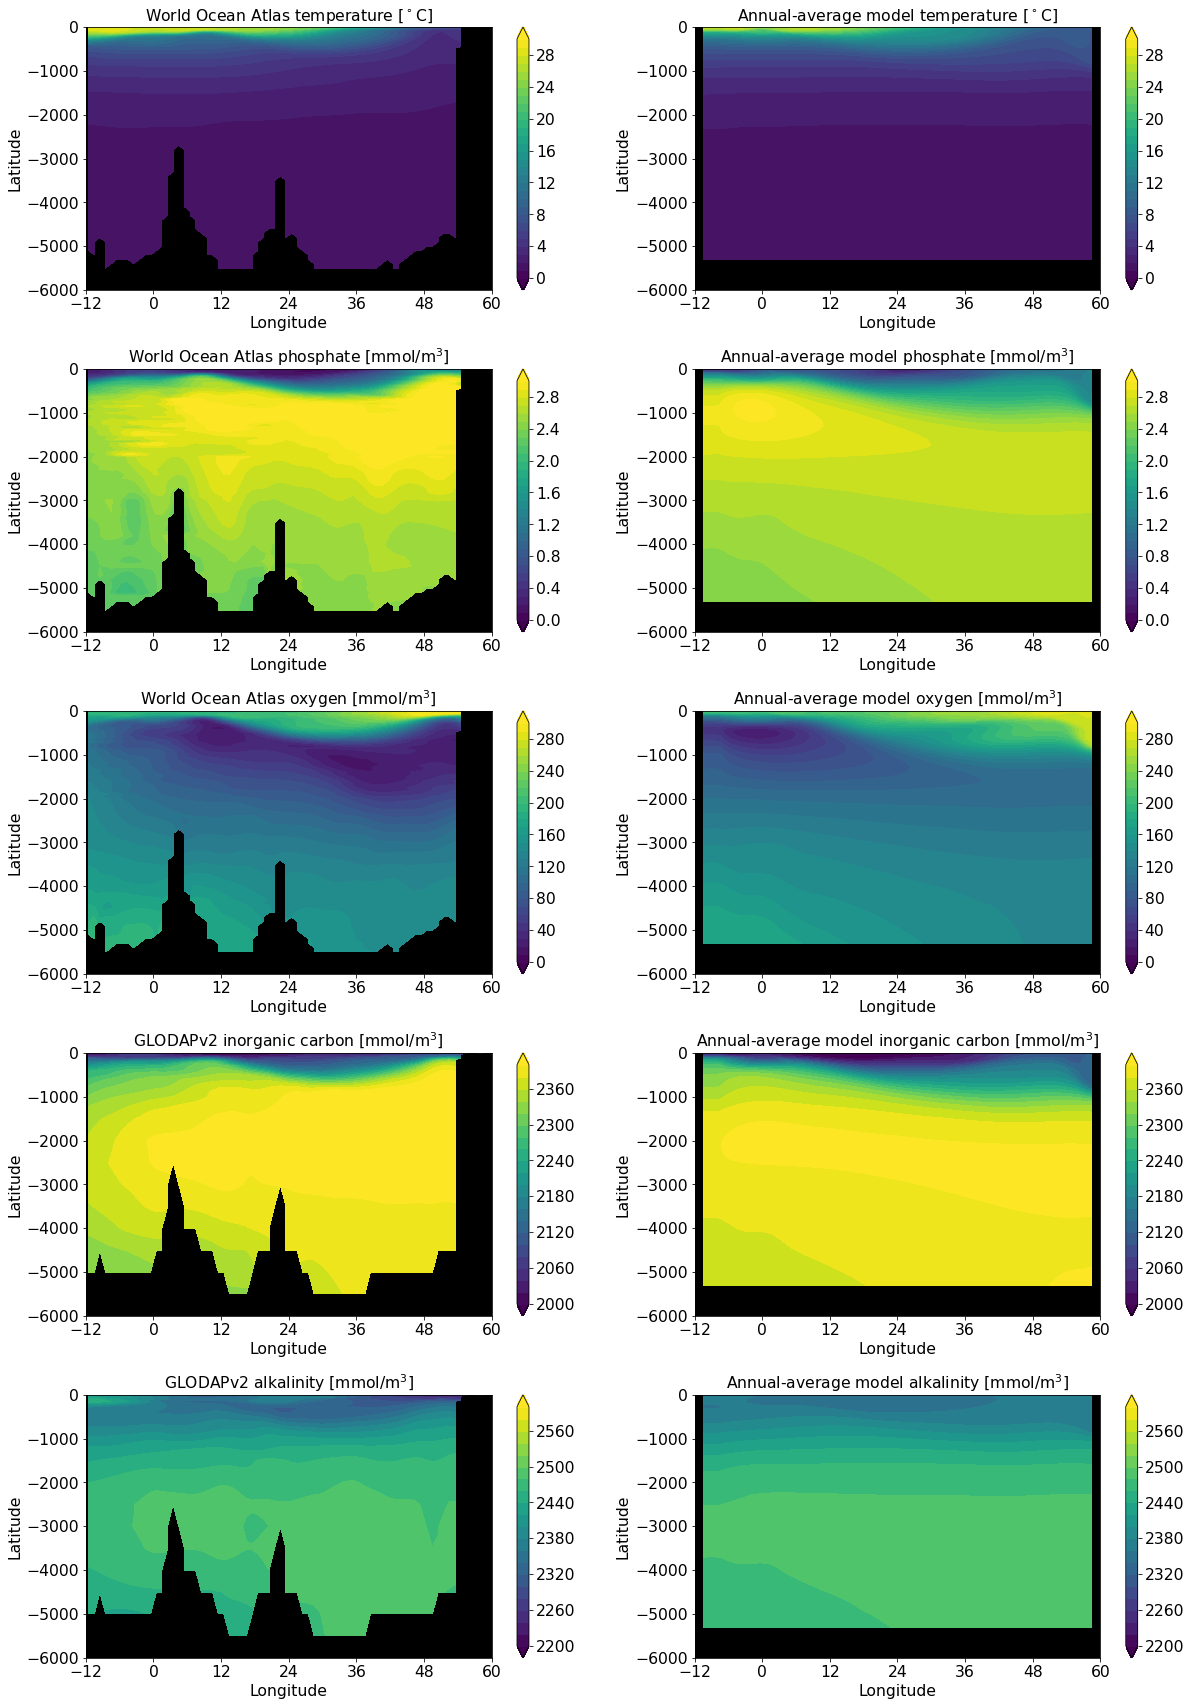

In [170]:
f5, f5ax = plt.subplots(figsize=(20,30),ncols=2,nrows=5)
f5cb =f5ax.copy()
f5cax=f5ax.copy()

# Sea surface temperature
f5cax[0,0]=f5ax[0,0].contourf(woa_data.lat,-woa_data.depth,
                              woa_data.tan.where(woa_data.pacific_mask==1).where(woa_data.lat >=-12).sel(lon=360-160,method='nearest'),
                              levels=np.arange(0,31,1),cmap='viridis',extend='both')
f5cb[0,0]=plt.colorbar(f5cax[0,0],ax=f5ax[0,0])
f5ax[0,0].set(ylim=(-6000,0),yticks=np.arange(-6000,1000,1000),xlim=(-12,60),xticks=np.arange(-12,72,12),
            title='World Ocean Atlas temperature [$^\circ$C]',xlabel='Longitude',ylabel='Latitude')
f5cax[0,1]=f5ax[0,1].contourf(grid_exp.YC,grid_exp.ZC,(ocediag.THETA.isel(T=-1)*grid_exp.cmask).sel(XC=360-160-116,method='nearest'),
                          levels=np.arange(0,31,1),extend='both',cmap='viridis')
f5cb[0,1]=plt.colorbar(f5cax[0,1],ax=f5ax[0,1])
f5ax[0,1].set(ylim=(-6000,0),yticks=np.arange(-6000,1000,1000),xlim=(-12,60),xticks=np.arange(-12,72,12),
            title='Annual-average model temperature [$^\circ$C]',xlabel='Longitude',ylabel='Latitude')
# Phosphate concentration
f5cax[1,0]=f5ax[1,0].contourf(woa_data.lat,-woa_data.depth,
                              1000*woa_data.pan.where(woa_data.pacific_mask==1).where(woa_data.lat >=-12).sel(lon=360-160,method='nearest'),
                              levels=np.arange(0,3.1,0.1),cmap='viridis',extend='both')
f5cb[1,0]=plt.colorbar(f5cax[1,0],ax=f5ax[1,0])
f5ax[1,0].set(ylim=(-6000,0),yticks=np.arange(-6000,1000,1000),xlim=(-12,60),xticks=np.arange(-12,72,12),
            title='World Ocean Atlas phosphate [mmol/m$^3$]',xlabel='Longitude',ylabel='Latitude')
f5cax[1,1]=f5ax[1,1].contourf(grid_exp.YC,grid_exp.ZC,
                              1000*(po4_flxdiag.TRAC03.isel(T=-1)*grid_exp.cmask).sel(XC=360-160-116,method='nearest'),
                              levels=np.arange(0,3.1,0.1),extend='both',cmap='viridis')
f5cb[1,1]=plt.colorbar(f5cax[1,1],ax=f5ax[1,1])
f5ax[1,1].set(ylim=(-6000,0),yticks=np.arange(-6000,1000,1000),xlim=(-12,60),xticks=np.arange(-12,72,12),
            title='Annual-average model phosphate [mmol/m$^3$]',xlabel='Longitude',ylabel='Latitude')
# Oxygen concentration
f5cax[2,0]=f5ax[2,0].contourf(woa_data.lat,-woa_data.depth,
                              woa_data.oan.where(woa_data.pacific_mask==1).where(woa_data.lat >=-12).sel(lon=360-160,method='nearest'),
                              levels=np.arange(0,310,10),cmap='viridis',extend='both')
f5cb[2,0]=plt.colorbar(f5cax[2,0],ax=f5ax[2,0])
f5ax[2,0].set(ylim=(-6000,0),yticks=np.arange(-6000,1000,1000),xlim=(-12,60),xticks=np.arange(-12,72,12),
            title='World Ocean Atlas oxygen [mmol/m$^3$]',xlabel='Longitude',ylabel='Latitude')
f5cax[2,1]=f5ax[2,1].contourf(grid_exp.YC,grid_exp.ZC,
                              1000*(do2_flxdiag.TRAC05.isel(T=-1)*grid_exp.cmask).sel(XC=360-160-116,method='nearest'),
                              levels=np.arange(0,310,10),extend='both',cmap='viridis')
f5cb[2,1]=plt.colorbar(f5cax[2,1],ax=f5ax[2,1])
f5ax[2,1].set(ylim=(-6000,0),yticks=np.arange(-6000,1000,1000),xlim=(-12,60),xticks=np.arange(-12,72,12),
            title='Annual-average model oxygen [mmol/m$^3$]',xlabel='Longitude',ylabel='Latitude')
# DIC concentration
f5cax[3,0]=f5ax[3,0].contourf(glo_data.lat,-glo_data.depth,
                              1000*glo_data.TCO2.where(glo_data.pacific_mask==1).where(glo_data.lat >=-12).sel(lon=360-160,method='nearest'),
                              levels=np.arange(2000,2420,20),cmap='viridis',extend='both')
f5cb[3,0]=plt.colorbar(f5cax[3,0],ax=f5ax[3,0])
f5ax[3,0].set(ylim=(-6000,0),yticks=np.arange(-6000,1000,1000),xlim=(-12,60),xticks=np.arange(-12,72,12),
            title='GLODAPv2 inorganic carbon [mmol/m$^3$]',xlabel='Longitude',ylabel='Latitude')
f5cax[3,1]=f5ax[3,1].contourf(grid_exp.YC,grid_exp.ZC,
                              1000*(dic_flxdiag.TRAC01.isel(T=-1)*grid_exp.cmask).sel(XC=360-160-116,method='nearest'),
                              levels=np.arange(2000,2420,20),extend='both',cmap='viridis')
f5cb[3,1]=plt.colorbar(f5cax[3,1],ax=f5ax[3,1])
f5ax[3,1].set(ylim=(-6000,0),yticks=np.arange(-6000,1000,1000),xlim=(-12,60),xticks=np.arange(-12,72,12),
            title='Annual-average model inorganic carbon [mmol/m$^3$]',xlabel='Longitude',ylabel='Latitude')
# Alk concentration
f5cax[4,0]=f5ax[4,0].contourf(glo_data.lat,-glo_data.depth,
                              1000*glo_data.TALK.where(glo_data.pacific_mask==1).where(glo_data.lat >=-12).sel(lon=360-160,method='nearest'),
                              levels=np.arange(2200,2620,20),cmap='viridis',extend='both')
f5cb[4,0]=plt.colorbar(f5cax[4,0],ax=f5ax[4,0])
f5ax[4,0].set(ylim=(-6000,0),yticks=np.arange(-6000,1000,1000),xlim=(-12,60),xticks=np.arange(-12,72,12),
            title='GLODAPv2 alkalinity [mmol/m$^3$]',xlabel='Longitude',ylabel='Latitude')
f5cax[4,1]=f5ax[4,1].contourf(grid_exp.YC,grid_exp.ZC,
                              1000*(alk_flxdiag.TRAC02.isel(T=-1)*grid_exp.cmask).sel(XC=360-160-116,method='nearest'),
                              levels=np.arange(2200,2620,20),extend='both',cmap='viridis')
f5cb[4,1]=plt.colorbar(f5cax[4,1],ax=f5ax[4,1])
f5ax[4,1].set(ylim=(-6000,0),yticks=np.arange(-6000,1000,1000),xlim=(-12,60),xticks=np.arange(-12,72,12),
            title='Annual-average model alkalinity [mmol/m$^3$]',xlabel='Longitude',ylabel='Latitude')
f5ax=fix_contours(f5ax)
f5cb=fix_contours(f5cb)
# Can adjust the subplot size
plt.subplots_adjust(hspace=0.3)
plt.show()
f5.savefig('/home/jml1/inp_zon160W.pdf',facecolor=f2.get_facecolor(), edgecolor='none',bbox_inches='tight')

### Diagnose preformed and regenerated tracers

/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encoun

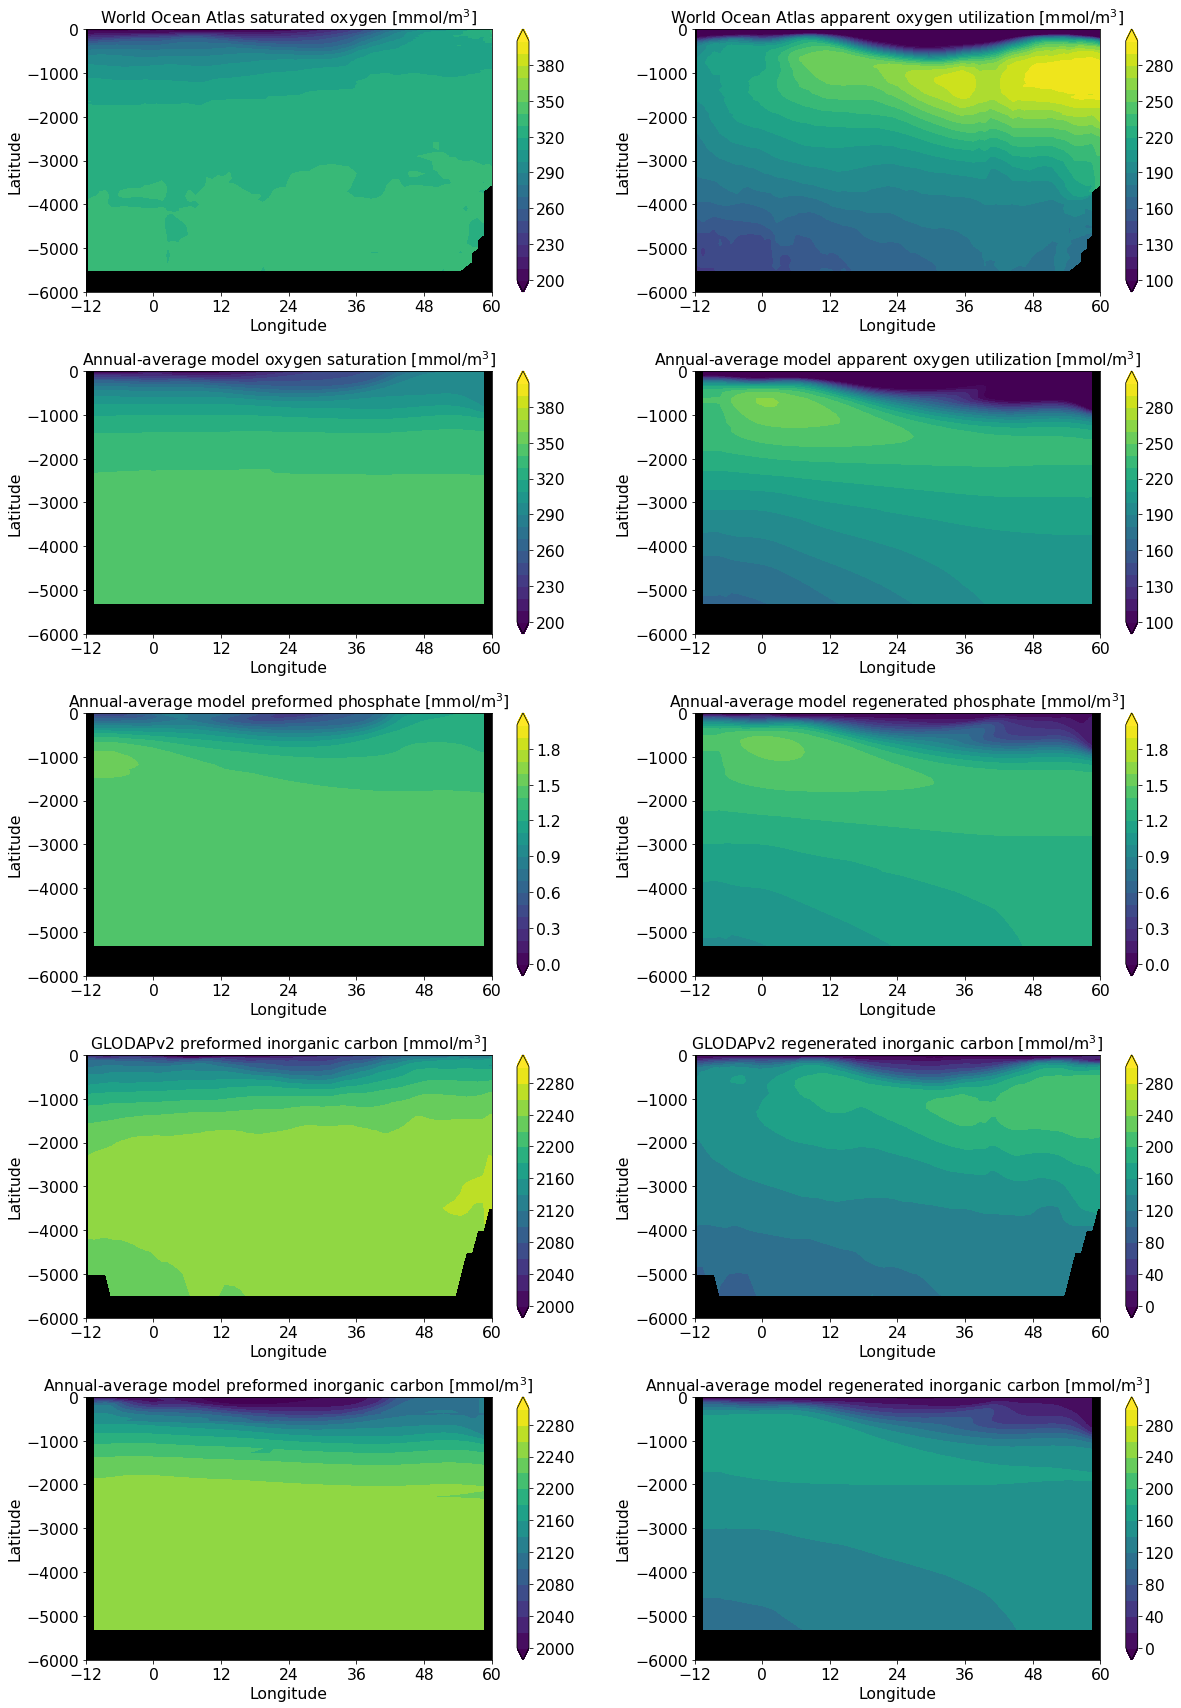

In [176]:
woa_data['xan']=woa_data['oan']+woa_data['uan']

do2_flxdiag['TRAC05sat']=mitgcm_tools.saturated_oxygen(ocediag['THETA'],35*xr.ones_like(ocediag['THETA']))
do2_flxdiag['TRAC05aou']=do2_flxdiag['TRAC05sat']-do2_flxdiag['TRAC05']

glo_data['OXYSAT']=mitgcm_tools.saturated_oxygen(glo_data['TEMP'],glo_data['SALT'],gsw=True)
glo_data['AOXYU']=glo_data['OXYSAT']-glo_data['DOXY']

f6, f6ax = plt.subplots(figsize=(20,30),ncols=2,nrows=5)
f6cb =f6ax.copy()
f6cax=f6ax.copy()

# Observations
f6cax[0,0]=f6ax[0,0].contourf(woa_data.lat,-woa_data.depth,
                              (woa_data.xan).where(woa_data.pacific_mask==1).where(woa_data.lat >=-12).mean('lon'),
                              levels=np.arange(200,410,10),cmap='viridis',extend='both')
f6cb[0,0]=plt.colorbar(f6cax[0,0],ax=f6ax[0,0])
f6ax[0,0].set(ylim=(-6000,0),yticks=np.arange(-6000,1000,1000),xlim=(-12,60),xticks=np.arange(-12,72,12),
            title='World Ocean Atlas saturated oxygen [mmol/m$^3$]',xlabel='Longitude',ylabel='Latitude')
f6cax[0,1]=f6ax[0,1].contourf(woa_data.lat,-woa_data.depth,
                              woa_data.uan.where(woa_data.pacific_mask==1).where(woa_data.lat >=-12).mean('lon'),
                              levels=np.arange(100,310,10),cmap='viridis',extend='both')
f6cb[0,1]=plt.colorbar(f6cax[0,1],ax=f6ax[0,1])
f6ax[0,1].set(ylim=(-6000,0),yticks=np.arange(-6000,1000,1000),xlim=(-12,60),xticks=np.arange(-12,72,12),
            title='World Ocean Atlas apparent oxygen utilization [mmol/m$^3$]',xlabel='Longitude',ylabel='Latitude')
# Oxygen concentration
f6cax[1,0]=f6ax[1,0].contourf(grid_exp.YC,grid_exp.ZC,
                              1000*(do2_flxdiag.TRAC05sat.isel(T=-1)*grid_exp.cmask).mean('XC'),
                              levels=np.arange(200,410,10),extend='both',cmap='viridis')
f6cb[1,0]=plt.colorbar(f6cax[1,0],ax=f6ax[1,0])
f6ax[1,0].set(ylim=(-6000,0),yticks=np.arange(-6000,1000,1000),xlim=(-12,60),xticks=np.arange(-12,72,12),
            title='Annual-average model oxygen saturation [mmol/m$^3$]',xlabel='Longitude',ylabel='Latitude')
f6cax[1,1]=f6ax[1,1].contourf(grid_exp.YC,grid_exp.ZC,
                              1000*(do2_flxdiag.TRAC05aou.isel(T=-1)*grid_exp.cmask).mean('XC'),
                              levels=np.arange(100,310,10),extend='both',cmap='viridis')
f6cb[1,1]=plt.colorbar(f6cax[1,1],ax=f6ax[1,1])
f6ax[1,1].set(ylim=(-6000,0),yticks=np.arange(-6000,1000,1000),xlim=(-12,60),xticks=np.arange(-12,72,12),
            title='Annual-average model apparent oxygen utilization [mmol/m$^3$]',xlabel='Longitude',ylabel='Latitude')
# Phosphate concentration
f6cax[2,0]=f6ax[2,0].contourf(grid_exp.YC,grid_exp.ZC,
                              1000*((po4_flxdiag.TRAC03-(1/170)*do2_flxdiag['TRAC05aou']).isel(T=-1)*grid_exp.cmask).mean('XC'),
                              levels=np.arange(0,2.1,0.1),extend='both',cmap='viridis')
f6cb[2,0]=plt.colorbar(f6cax[2,0],ax=f6ax[2,0])
f6ax[2,0].set(ylim=(-6000,0),yticks=np.arange(-6000,1000,1000),xlim=(-12,60),xticks=np.arange(-12,72,12),
            title='Annual-average model preformed phosphate [mmol/m$^3$]',xlabel='Longitude',ylabel='Latitude')
f6cax[2,1]=f6ax[2,1].contourf(grid_exp.YC,grid_exp.ZC,
                              1000*(((1/170)*do2_flxdiag['TRAC05aou'].isel(T=-1))*grid_exp.cmask).mean('XC'),
                              levels=np.arange(0,2.1,0.1),extend='both',cmap='viridis')
f6cb[2,1]=plt.colorbar(f6cax[2,1],ax=f6ax[2,1])
f6ax[2,1].set(ylim=(-6000,0),yticks=np.arange(-6000,1000,1000),xlim=(-12,60),xticks=np.arange(-12,72,12),
              title='Annual-average model regenerated phosphate [mmol/m$^3$]',xlabel='Longitude',ylabel='Latitude')
# GLODAP DIC concentration
f6cax[3,0]=f6ax[3,0].contourf(glo_data.lat,-glo_data.depth,
                              1000*(glo_data.TCO2-(117/170)*glo_data.AOXYU).where(glo_data.pacific_mask==1).where(glo_data.lat >=-12).mean('lon'),
                              levels=np.arange(2000,2320,20),cmap='viridis',extend='both')
f6cb[3,0]=plt.colorbar(f6cax[3,0],ax=f6ax[3,0])
f6ax[3,0].set(ylim=(-6000,0),yticks=np.arange(-6000,1000,1000),xlim=(-12,60),xticks=np.arange(-12,72,12),
            title='GLODAPv2 preformed inorganic carbon [mmol/m$^3$]',xlabel='Longitude',ylabel='Latitude')
f6cax[3,1]=f6ax[3,1].contourf(glo_data.lat,-glo_data.depth,
                              1000*(117/170)*glo_data.AOXYU.where(glo_data.pacific_mask==1).where(glo_data.lat >=-12).mean('lon'),
                              levels=np.arange(0,320,20),cmap='viridis',extend='both')
f6cb[3,1]=plt.colorbar(f6cax[3,1],ax=f6ax[3,1])
f6ax[3,1].set(ylim=(-6000,0),yticks=np.arange(-6000,1000,1000),xlim=(-12,60),xticks=np.arange(-12,72,12),
            title='GLODAPv2 regenerated inorganic carbon [mmol/m$^3$]',xlabel='Longitude',ylabel='Latitude')
# DIC concentration
f6cax[4,0]=f6ax[4,0].contourf(grid_exp.YC,grid_exp.ZC,
                              1000*((dic_flxdiag.TRAC01-(117/170)*do2_flxdiag.TRAC05aou).isel(T=-1)*grid_exp.cmask).mean('XC'),
                              levels=np.arange(2000,2320,20),extend='both',cmap='viridis')
f6cb[4,0]=plt.colorbar(f6cax[4,0],ax=f6ax[4,0])
f6ax[4,0].set(ylim=(-6000,0),yticks=np.arange(-6000,1000,1000),xlim=(-12,60),xticks=np.arange(-12,72,12),
            title='Annual-average model preformed inorganic carbon [mmol/m$^3$]',xlabel='Longitude',ylabel='Latitude')
f6cax[4,1]=f6ax[4,1].contourf(grid_exp.YC,grid_exp.ZC,
                              1000*((117/170)*do2_flxdiag.TRAC05aou.isel(T=-1)*grid_exp.cmask).mean('XC'),
                              levels=np.arange(0,320,20),extend='both',cmap='viridis')
f6cb[4,1]=plt.colorbar(f6cax[4,1],ax=f6ax[4,1])
f6ax[4,1].set(ylim=(-6000,0),yticks=np.arange(-6000,1000,1000),xlim=(-12,60),xticks=np.arange(-12,72,12),
            title='Annual-average model regenerated inorganic carbon [mmol/m$^3$]',xlabel='Longitude',ylabel='Latitude')
f6ax=fix_contours(f6ax)
f6cb=fix_contours(f6cb)
# Can adjust the subplot size
plt.subplots_adjust(hspace=0.3)
plt.show()
f6.savefig('/home/jml1/inp_zonmean_pref.pdf',facecolor=f6.get_facecolor(), edgecolor='none',bbox_inches='tight')

/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/jml1/.conda/envs/mitgcm/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


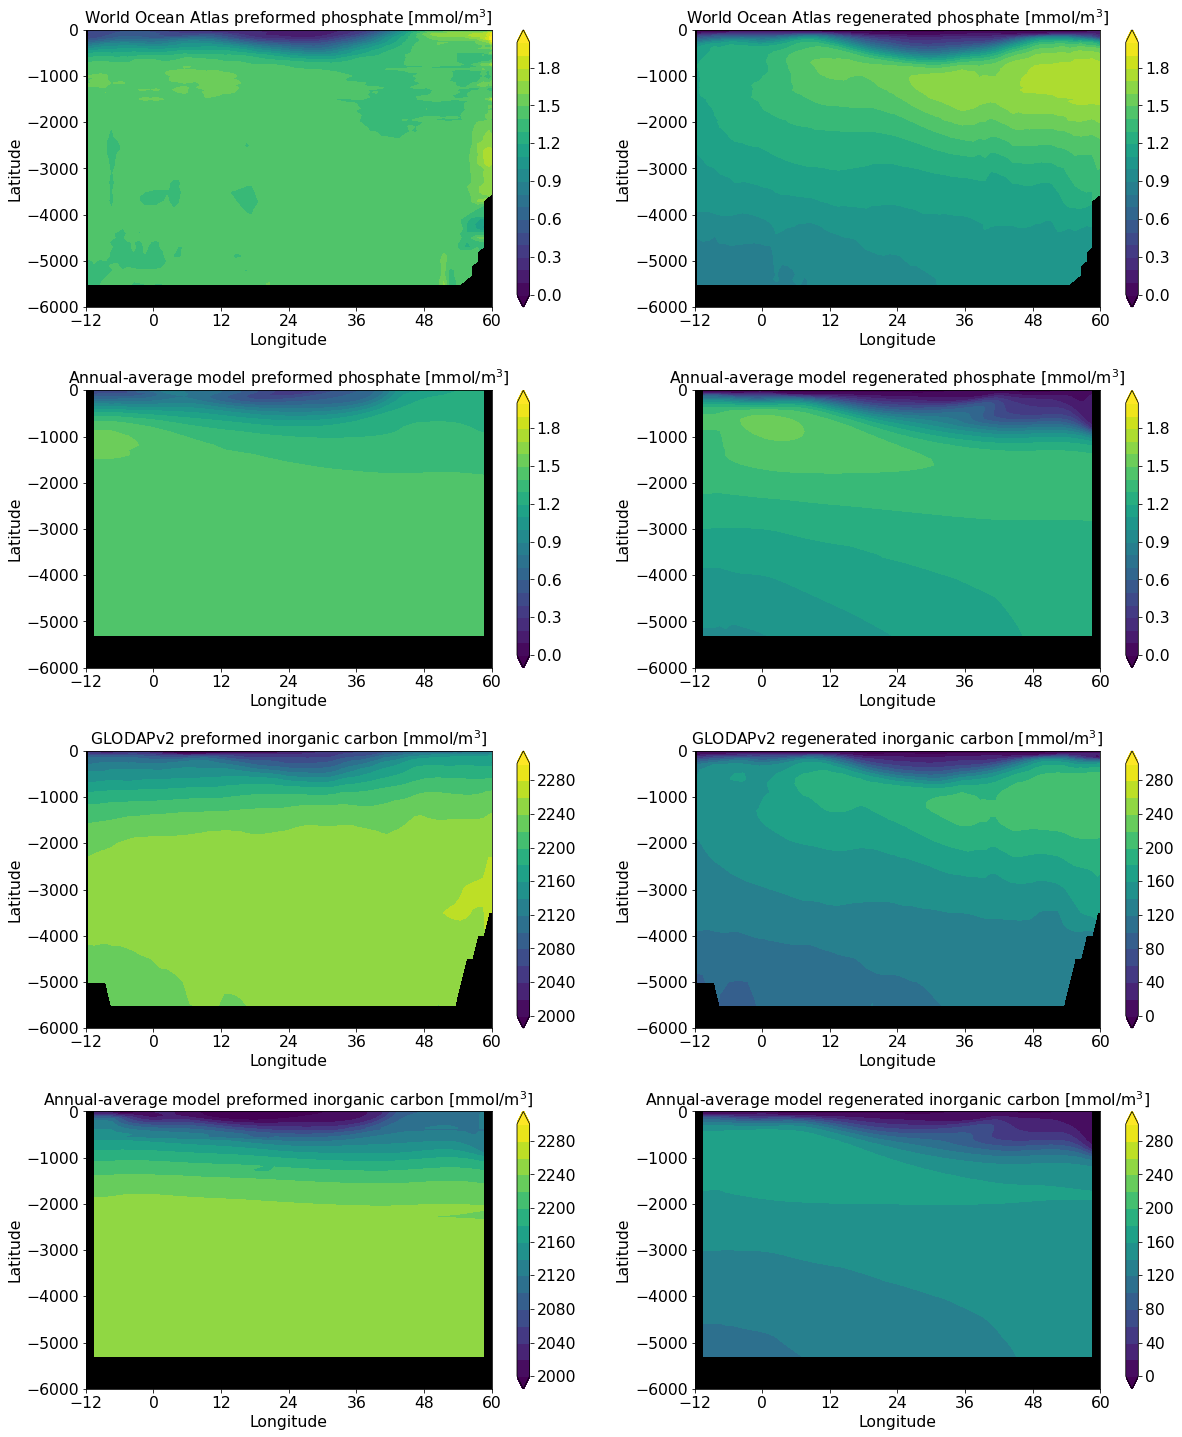

In [183]:
f7, f7ax = plt.subplots(figsize=(20,25),ncols=2,nrows=4)
f7cb =f7ax.copy()
f7cax=f7ax.copy()

# Observations
f7cax[0,0]=f7ax[0,0].contourf(woa_data.lat,-woa_data.depth,
                              ((1000*woa_data.pan-(1/170)*woa_data.uan)).where(woa_data.pacific_mask==1).where(woa_data.lat >=-12).mean('lon'),
                              levels=np.arange(0,2.1,0.1),cmap='viridis',extend='both')
f7cb[0,0]=plt.colorbar(f7cax[0,0],ax=f7ax[0,0])
f7ax[0,0].set(ylim=(-6000,0),yticks=np.arange(-6000,1000,1000),xlim=(-12,60),xticks=np.arange(-12,72,12),
            title='World Ocean Atlas preformed phosphate [mmol/m$^3$]',xlabel='Longitude',ylabel='Latitude')
f7cax[0,1]=f7ax[0,1].contourf(woa_data.lat,-woa_data.depth,
                              (1/170)*woa_data.uan.where(woa_data.pacific_mask==1).where(woa_data.lat >=-12).mean('lon'),
                              levels=np.arange(0,2.1,0.1),cmap='viridis',extend='both')
f7cb[0,1]=plt.colorbar(f7cax[0,1],ax=f7ax[0,1])
f7ax[0,1].set(ylim=(-6000,0),yticks=np.arange(-6000,1000,1000),xlim=(-12,60),xticks=np.arange(-12,72,12),
            title='World Ocean Atlas regenerated phosphate [mmol/m$^3$]',xlabel='Longitude',ylabel='Latitude')
# Phosphate concentration
f7cax[1,0]=f7ax[1,0].contourf(grid_exp.YC,grid_exp.ZC,
                              1000*((po4_flxdiag.TRAC03-(1/170)*do2_flxdiag['TRAC05aou']).isel(T=-1)*grid_exp.cmask).mean('XC'),
                              levels=np.arange(0,2.1,0.1),extend='both',cmap='viridis')
f7cb[1,0]=plt.colorbar(f7cax[1,0],ax=f7ax[1,0])
f7ax[1,0].set(ylim=(-6000,0),yticks=np.arange(-6000,1000,1000),xlim=(-12,60),xticks=np.arange(-12,72,12),
            title='Annual-average model preformed phosphate [mmol/m$^3$]',xlabel='Longitude',ylabel='Latitude')
f7cax[1,1]=f7ax[1,1].contourf(grid_exp.YC,grid_exp.ZC,
                              1000*(((1/170)*do2_flxdiag['TRAC05aou'].isel(T=-1))*grid_exp.cmask).mean('XC'),
                              levels=np.arange(0,2.1,0.1),extend='both',cmap='viridis')
f7cb[1,1]=plt.colorbar(f7cax[1,1],ax=f7ax[1,1])
f7ax[1,1].set(ylim=(-6000,0),yticks=np.arange(-6000,1000,1000),xlim=(-12,60),xticks=np.arange(-12,72,12),
              title='Annual-average model regenerated phosphate [mmol/m$^3$]',xlabel='Longitude',ylabel='Latitude')
# GLODAP DIC concentration
f7cax[2,0]=f7ax[2,0].contourf(glo_data.lat,-glo_data.depth,
                              1000*(glo_data.TCO2-(117/170)*glo_data.AOXYU).where(glo_data.pacific_mask==1).where(glo_data.lat >=-12).mean('lon'),
                              levels=np.arange(2000,2320,20),cmap='viridis',extend='both')
f7cb[2,0]=plt.colorbar(f7cax[2,0],ax=f7ax[2,0])
f7ax[2,0].set(ylim=(-6000,0),yticks=np.arange(-6000,1000,1000),xlim=(-12,60),xticks=np.arange(-12,72,12),
            title='GLODAPv2 preformed inorganic carbon [mmol/m$^3$]',xlabel='Longitude',ylabel='Latitude')
f7cax[2,1]=f7ax[2,1].contourf(glo_data.lat,-glo_data.depth,
                              1000*(117/170)*glo_data.AOXYU.where(glo_data.pacific_mask==1).where(glo_data.lat >=-12).mean('lon'),
                              levels=np.arange(0,320,20),cmap='viridis',extend='both')
f7cb[2,1]=plt.colorbar(f7cax[2,1],ax=f7ax[2,1])
f7ax[2,1].set(ylim=(-6000,0),yticks=np.arange(-6000,1000,1000),xlim=(-12,60),xticks=np.arange(-12,72,12),
            title='GLODAPv2 regenerated inorganic carbon [mmol/m$^3$]',xlabel='Longitude',ylabel='Latitude')
# DIC concentration
f7cax[3,0]=f7ax[3,0].contourf(grid_exp.YC,grid_exp.ZC,
                              1000*((dic_flxdiag.TRAC01-(117/170)*do2_flxdiag.TRAC05aou).isel(T=-1)*grid_exp.cmask).mean('XC'),
                              levels=np.arange(2000,2320,20),extend='both',cmap='viridis')
f7cb[3,0]=plt.colorbar(f7cax[3,0],ax=f7ax[3,0])
f7ax[3,0].set(ylim=(-6000,0),yticks=np.arange(-6000,1000,1000),xlim=(-12,60),xticks=np.arange(-12,72,12),
            title='Annual-average model preformed inorganic carbon [mmol/m$^3$]',xlabel='Longitude',ylabel='Latitude')
f7cax[3,1]=f7ax[3,1].contourf(grid_exp.YC,grid_exp.ZC,
                              1000*((117/170)*do2_flxdiag.TRAC05aou.isel(T=-1)*grid_exp.cmask).mean('XC'),
                              levels=np.arange(0,320,20),extend='both',cmap='viridis')
f7cb[3,1]=plt.colorbar(f7cax[3,1],ax=f7ax[3,1])
f7ax[3,1].set(ylim=(-6000,0),yticks=np.arange(-6000,1000,1000),xlim=(-12,60),xticks=np.arange(-12,72,12),
            title='Annual-average model regenerated inorganic carbon [mmol/m$^3$]',xlabel='Longitude',ylabel='Latitude')
f7ax=fix_contours(f7ax)
f7cb=fix_contours(f7cb)
# Can adjust the subplot size
plt.subplots_adjust(hspace=0.3)
plt.show()
f7.savefig('/home/jml1/inp_zonmean_pref2.pdf',facecolor=f7.get_facecolor(), edgecolor='none',bbox_inches='tight')